In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

In [2]:
import pickle
data=pickle.load(open('processed_data.p', "rb" ))
data.head(3)

,Country,Location,Resource Type,floor,Department,seatName,Space,Datetime
0,India,Tower 2,Desk,Level 9,Sky Branch,B5_9_1_02,0,2018-03-01
1,India,Tower 2,Desk,Level 9,Sky Branch,B5_9_2_02,0,2018-03-01
2,India,Tower 2,Desk,Level 9,Sky Branch,B5_9_2_07,0,2018-03-01


In [3]:
trial_data=data.loc[data['seatName']=='B5_9_1_05']
print(len(trial_data))
trial_data=trial_data.sort_values(['Datetime'])
trial_data=trial_data.drop(['Country','Location','Resource Type','floor','Department','seatName'],axis=1)
#trial_data.set_index('Datetime',inplace=True)

4464


In [4]:
train_data,test_data=trial_data.loc[trial_data['Datetime']<'2018-03-25'], trial_data.loc[trial_data['Datetime']>='2018-03-25']
print(len(train_data),len(test_data))

3456 1008


In [5]:
# convert an array of values into a dataset matrix
def create_dataset(dataset,look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [7]:
# reshape into X=t and Y=t+1
look_back = 1
X_train, y_train= create_dataset(train_data.values, look_back)
X_test, y_test = create_dataset(test_data.values, look_back)
#y_test_time=timeseries_to_supervised(test_data,look_back)
#y_test_time.columns=['X','Date',  'y', 'Date_shift']
#X_test, y_test=y_test_time['X'].values,y_test_time['y'].values
#X_test, y_test=np.array(X_test),np.array(y_test)
#display(y_test_time.head(3))

In [9]:
#print(len(y_test),len(y_test_time['Date_shift']))

In [10]:
X_train.shape,X_test.shape

((3454, 1), (1006, 1))

In [11]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [12]:
from keras.models import Sequential
from keras.layers import LSTM,Conv1D,Dense
from keras.layers.normalization import BatchNormalization

def arch():
    seq = Sequential()
    #seq.add(LSTM(4,input_shape=(1,look_back)))
    seq.add(LSTM(8,input_shape=(1,look_back)))

    seq.add(Dense(1, activation='sigmoid'))
    seq.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return seq


model=arch()
batch_size = 32
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=100,shuffle=False,
          validation_data=(X_test, y_test))

C:\Users\ndrs\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 3454 samples, validate on 1006 samples
Epoch 1/100
3454/3454 [==============================] - 4s 1ms/step - loss: 0.6646 - acc: 0.8804 - val_loss: 0.6341 - val_acc: 0.8588
Epoch 2/100
3454/3454 [==============================] - 1s 210us/step - loss: 0.5928 - acc: 0.8804 - val_loss: 0.5575 - val_acc: 0.8588
Epoch 3/100
3454/3454 [==============================] - 1s 222us/step - loss: 0.5065 - acc: 0.8804 - val_loss: 0.4732 - val_acc: 0.8588
Epoch 4/100
3454/3454 [==============================] - 1s 237us/step - loss: 0.4213 - acc: 0.8804 - val_loss: 0.3994 - val_acc: 0.8588
Epoch 5/100
3454/3454 [==============================] - 1s 226us/step - loss: 0.3524 - acc: 0.8804 - val_loss: 0.3437 - val_acc: 0.8588
Epoch 6/100
3454/3454 [==============================] - 1s 209us/step - loss: 0.3015 - acc: 0.8804 - val_loss: 0.3027 - va

3454/3454 [==============================] - 1s 278us/step - loss: 0.1806 - acc: 0.9479 - val_loss: 0.2119 - val_acc: 0.9364
Epoch 56/100
3454/3454 [==============================] - 1s 245us/step - loss: 0.1806 - acc: 0.9479 - val_loss: 0.2119 - val_acc: 0.9364
Epoch 57/100
3454/3454 [==============================] - 1s 214us/step - loss: 0.1806 - acc: 0.9479 - val_loss: 0.2119 - val_acc: 0.9364
Epoch 58/100
3454/3454 [==============================] - 1s 263us/step - loss: 0.1806 - acc: 0.9479 - val_loss: 0.2119 - val_acc: 0.9364
Epoch 59/100
3454/3454 [==============================] - 1s 222us/step - loss: 0.1806 - acc: 0.9479 - val_loss: 0.2119 - val_acc: 0.9364
Epoch 60/100
3454/3454 [==============================] - 1s 196us/step - loss: 0.1806 - acc: 0.9479 - val_loss: 0.2119 - val_acc: 0.9364
Epoch 61/100
3454/3454 [==============================] - 1s 220us/step - loss: 0.1806 - acc: 0.9479 - val_loss: 0.2119 - val_acc: 0.9364
Epoch 62/100
3454/3454 [=======================

In [75]:
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

1006/1006 [==============================] - 0s 84us/step
Test score: 0.21193217906071463
Test accuracy: 0.9363817097415507


In [84]:
testPredict = model.predict(X_test)
len(testPredict),len(time_series)

(1006, 0)

In [103]:
time_series=test_data[-1007:-1]
#time_series.drop(time_series[1:-1],axis=0)
time_series['Pred']=testPredict
time_series.set_index('Datetime',inplace=True)
#y_test_time['pred']=testPredict
#pd.concat([,testPredict],axis=1)

C:\Users\ndrs\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


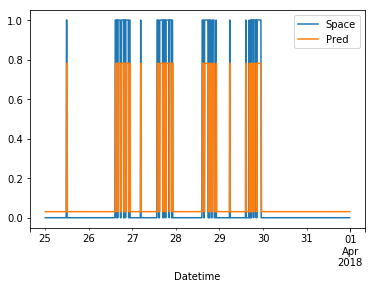

In [106]:
import matplotlib.pyplot as plt
time_series.plot();

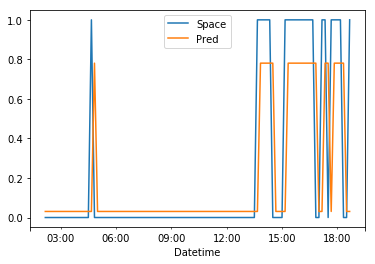

In [107]:
time_series[300:400].plot();

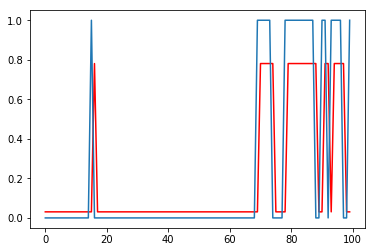

In [105]:
plt.plot(testPredict[300:400],color='r')
plt.plot(y_test[300:400])
plt.show();